In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
dataset = pd.DataFrame(housing.data)

In [5]:
dataset.columns = housing.feature_names

In [6]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# Independent Feature and dependent feature
X=dataset
Y=housing.target

In [8]:
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
## train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [11]:
## standardization process for dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)

In [13]:
X_test=scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [15]:
regression= LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [16]:
mse=cross_val_score(regression, X_train, Y_train,scoring='neg_mean_squared_error', cv=10)

In [19]:
np.mean(mse)

np.float64(-0.5196355647645039)

In [20]:
##predicting the model
reg_predict=regression.predict(X_test)

In [21]:
reg_predict

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [22]:
import seaborn as sns

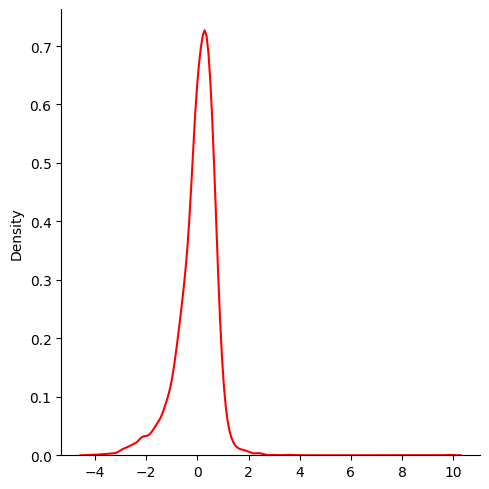

In [23]:
sns.displot(reg_predict - Y_test,kind="kde", color="red")

In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test, reg_predict)

0.5757877060324508

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
#for tunning the hyperparameters we are using GridSearchCV  where we actually pass the parameters we want to tune 
#also maanagin the value of alpha or labmda
ridge_regressor = Ridge()

In [27]:
ridge_regressor

Ridge()

In [28]:
# Hyperparameter tuning for Ridge Regression using different values of alpha we use a dictionary to pass the parameters
ridge_params = {'alpha': [0.1, 1,2,5,10,20,30,40,50,60,70,80,90]}
ridge_regressor_cv = GridSearchCV(ridge_regressor, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_regressor_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [30]:
print(ridge_regressor_cv.best_params_)
print(ridge_regressor_cv.best_score_)

{'alpha': 0.1}
-0.5192651994657134


In [32]:
ridge_predict=ridge_regressor_cv.predict(X_test)

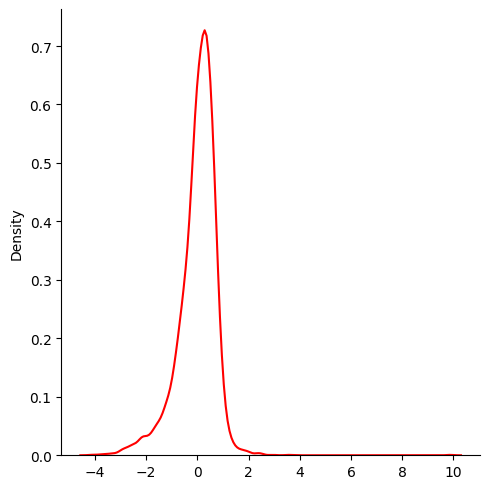

In [33]:
sns.displot(ridge_predict - Y_test,kind="kde", color="red")

In [34]:
r2_score(Y_test, ridge_predict)

0.5757905180002315

In [35]:
##lasso regression
from sklearn.linear_model import Lasso

In [36]:
lasos_regressor = Lasso()

In [ ]:
# Hyperparameter tuning for Ridge Regression using different values of alpha we use a dictionary to pass the parameters
lasso_params = {'alpha': [0.1, 1,2,5,10,20,30,40,50,60,70,80,90]}
lasso_regressor_cv = GridSearchCV(lasos_regressor, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_regressor_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [39]:
print("Best alpha:", lasso_regressor_cv.best_params_)
print("Best score:", lasso_regressor_cv.best_score_)

Best alpha: {'alpha': 0.1}
Best score: -0.6720927784211501


In [40]:
lasso_predict=lasso_regressor_cv.predict(X_test)

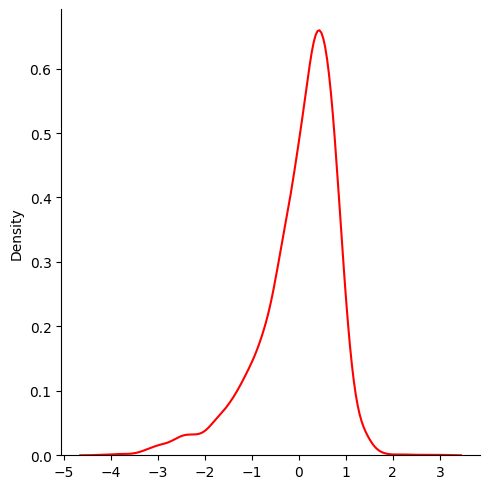

In [41]:
sns.displot(lasso_predict - Y_test,kind="kde", color="red")

In [11]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

In [17]:

from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('C:\Projects\MLdeep\housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [16]:
print(os.listdir("C:\Projects\MLdeep"))

['housing.csv', 'linearregression.ipynb', 'main.py', 'venv']


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
df=df[df['species'] != 'setosa']

In [14]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [17]:
df['species']=df['species'].map({'versicolor': 0, 'virginica': 1})

In [19]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
55,5.7,2.8,4.5,1.3,0
56,6.3,3.3,4.7,1.6,0
57,4.9,2.4,3.3,1.0,0
58,6.6,2.9,4.6,1.3,0
59,5.2,2.7,3.9,1.4,0


In [32]:
### Split the dataset into dependent and dependent features
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [33]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
Y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [38]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,10,20,30,40,50], 'max_iter':[100,200,300]}

In [39]:
claasifier_regressor=GridSearchCV(classifier, param_grid=parameters, cv=5, scoring='accuracy').fit(X_train, Y_train)

c:\Projects\MLdeep\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Projects\MLdeep\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Projects\MLdeep\venv\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Projects\MLdeep\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


In [40]:
print(claasifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [42]:
print(claasifier_regressor.best_score_)

0.9733333333333334


In [43]:
##prediction 
y_predict=claasifier_regressor.predict(X_test)

In [44]:
##accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [45]:
score=accuracy_score(Y_test, y_predict)
print("Accuracy Score:", score)

Accuracy Score: 0.92


In [46]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



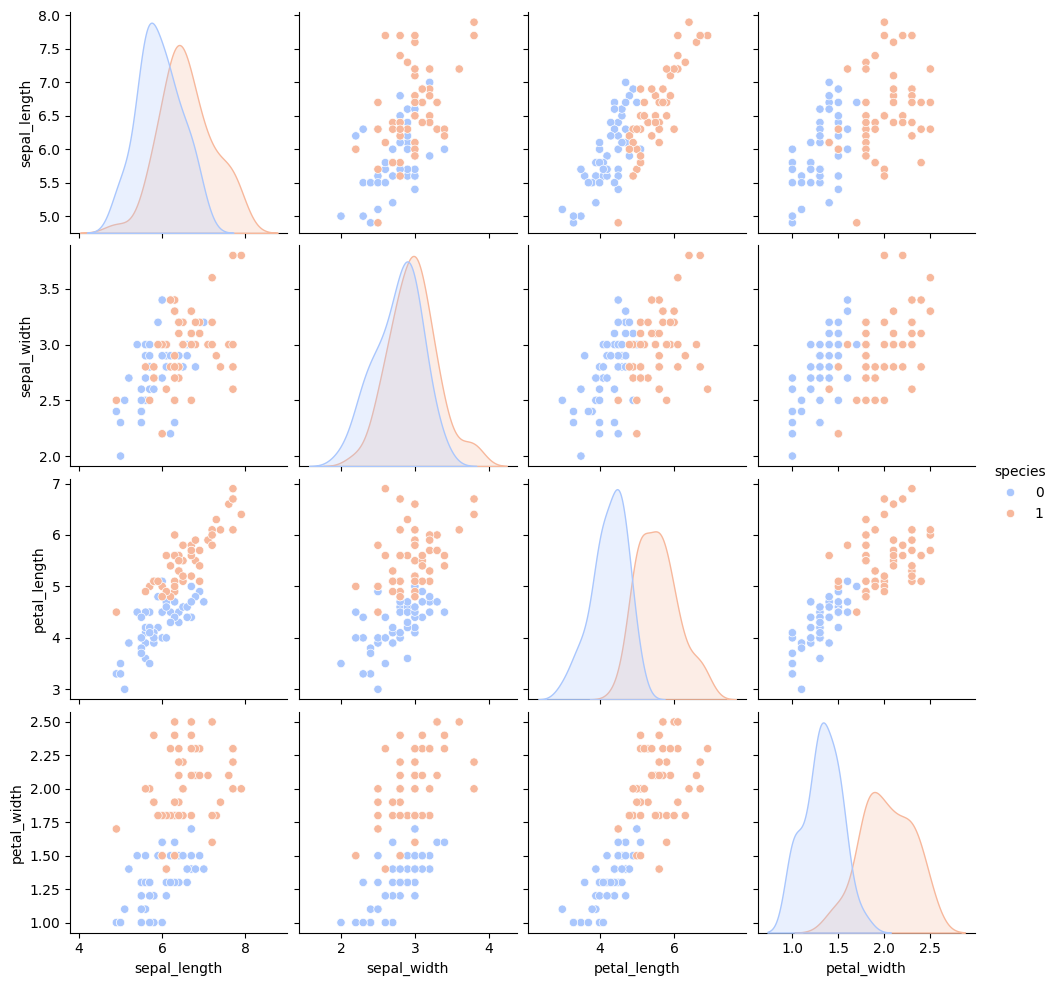

In [47]:
sns.pairplot(df, hue='species', palette='coolwarm')

In [48]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
